In [1]:
GENUINE_SIGNATURES_PREFIX = 'c-'
FORGED_SIGNATURES_PREFIX = 'cf-'
DATASET_PATH = 'C:\\Users\\ester\\faculdade\\tcc\\database_gpds\\SignatureGPDSSyntheticSignaturesManuscripts\\firmasSINTESISmanuscritas\\'

In [19]:
import os
from PIL import Image
import numpy as np
import cv2 as cv
from skimage.transform import resize
import matplotlib.pyplot as plt

In [14]:
def otsu_thresholding(image_array):
    '''
    Aplica a limiarização de Otsu numa imagem.
    Recebe um ndarray.
    Retorna um ndarray onde os pixels brancos representam o objeto e os pixels pretos
    representam o plano de fundo.
    '''

    threshold, otsu_result = cv.threshold(image_array, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    #otsu_inverted = otsu_result^1
    return threshold, otsu_result

In [15]:
def load_image(image_path):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image_array = np.array(gray_image)

    return image_array

In [77]:
path = 'C:\\Users\\ester\\faculdade\\tcc\\database_gpds\\SignatureGPDSSyntheticSignaturesManuscripts\\firmasSINTESISmanuscritas\\002\\cf-002-26.jpg'

In [78]:
image_loaded = load_image(path)

In [79]:
thr, otsued = otsu_thresholding(image_loaded)

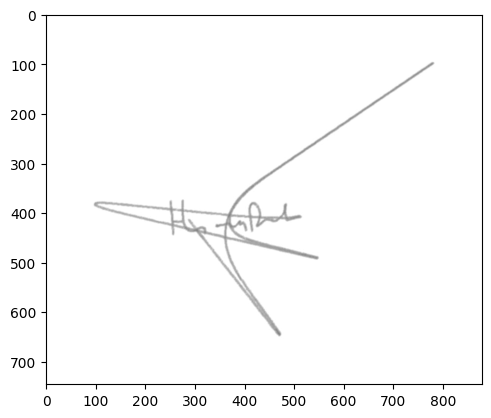

In [80]:
plt.imshow(image_loaded, cmap='gray', vmin=0, vmax=255)

In [81]:
image_loaded[image_loaded > thr] = 255

In [82]:
inverted =  255.0 - image_loaded

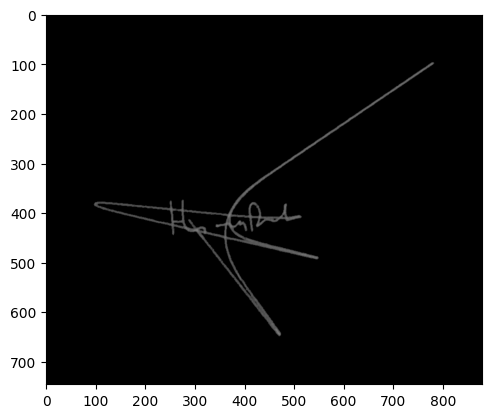

In [83]:
plt.imshow(inverted, cmap='gray', vmin=0, vmax=255)

In [42]:
#image_loaded[190:210, 400:410]

In [84]:
aspect_ratio = 15 / 22  # Target aspect ratio
height, width = inverted.shape
current_ratio = height / width

closest_width = (round(width / 22) * 22) + 22
closest_height = (round(height / 15) * 15) + 15

In [85]:
aspect_ratio

0.6818181818181818

In [86]:
current_ratio

0.8486916951080774

In [87]:
if not np.allclose(aspect_ratio, current_ratio):
    padding_w = 0
    padding_h = 0

    if aspect_ratio * closest_width > height:

        padding_w = int((closest_width - width) / 2)
        padding_h = int((aspect_ratio * closest_width - height) / 2)
    
    elif closest_height / aspect_ratio > width:
        
        padding_w = int((closest_height / aspect_ratio - width) / 2)
        padding_h = int((closest_height - height) / 2)

    padded = np.pad(inverted, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)

resized_image = resize(padded, (150, 220), anti_aliasing=True).astype(np.uint8)
#resized_image = (resized_image * 255)

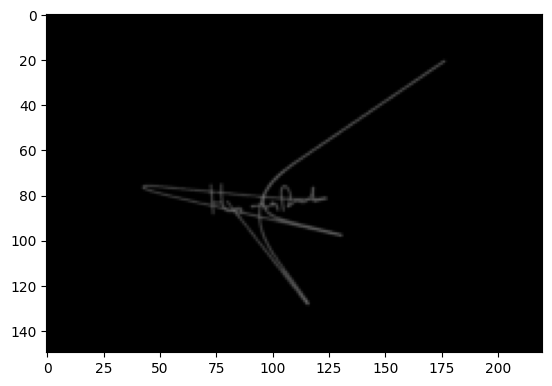

In [88]:
plt.imshow(resized_image, cmap='gray', vmin=0, vmax=255)

In [99]:
os.path.join('001','image.jpg')

'001\\image.jpg'

In [98]:
cv.imwrite('002_cf_26_example.jpg', resized_image)

True

In [94]:
thr, otsued = threshold, otsu_result = cv.threshold(resized_image, 0, 1, cv.THRESH_BINARY + cv.THRESH_OTSU)

In [95]:
np.max(otsued)

1

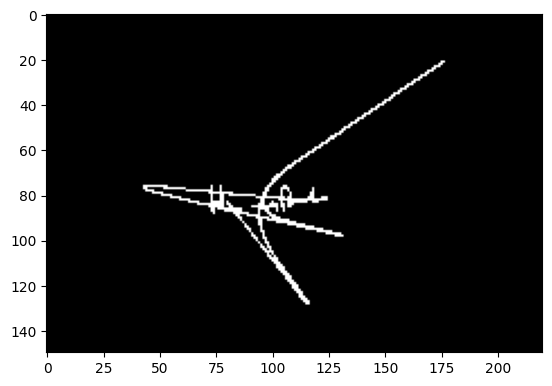

In [97]:
plt.imshow(otsued, cmap='gray', vmin=0, vmax=1)

In [2]:




def preprocess(root_dir, output_dir):
    counter = 0

    for subdir, dirs, files in os.walk(root_dir):
        counter += 1
        for file in files:
            file_path = os.path.join(subdir, file)
            
            try:
                with Image.open(file_path,) as img:
                    if img.format.lower() not in ['jpeg', 'jpg']:
                        continue
                    
                    img_gray = img.convert('L')
                    
                    binary = otsu_thresholding(np.array(img_gray))
                    
                    aspect_ratio = 15 / 22  # Target aspect ratio
                    width, height = img.size
                    current_ratio = height / width

                    closest_width = (round(width / 22) * 22) + 22
                    closest_height = (round(height / 15) * 15) + 15

                    if not np.allclose(aspect_ratio, current_ratio):
                        padding_w = 0
                        padding_h = 0

                        if aspect_ratio * closest_width > height:

                            padding_w = int((closest_width - width) / 2)
                            padding_h = int((aspect_ratio * closest_width - height) / 2)
                        
                        elif closest_height / aspect_ratio > width:
                            
                            padding_w = int((closest_height / aspect_ratio - width) / 2)
                            padding_h = int((closest_height - height) / 2)

                        binary = np.pad(binary, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=255)
                    
                    resized_image = resize(binary, (210, 308), anti_aliasing=True)
                    resized_image = (resized_image * 255).astype(np.uint8)

                    result_image = Image.fromarray(resized_image, mode='L')
                    
                    
                    new_dir = os.path.join(output_dir, os.path.basename(subdir))
                    if not os.path.exists(new_dir):
                        os.makedirs(new_dir)

                    output_path = os.path.join(new_dir, file)
                    result_image.save(output_path, mode='L', format='png')
                    
            except Exception as e:
                continue
    
    if counter % 100 == 0:
        print('chegou no '+str(counter))

input_dir = DATASET_PATH
output_dir = 'preprocessed-images\\'

preprocess(input_dir, output_dir)


KeyboardInterrupt: 